In [20]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
from importlib import import_module


from matplotlib import pyplot as plt
from PIL import Image
from PIL import Image, ImageDraw, ImageFont

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


# This is needed to display the images.
%matplotlib inline

In [21]:
# Data Path
DATADIR = '/Users/yanxiang.zyx/KIPRO/learning_by_association/semisup/data/npy'

In [22]:
# Plot images and put a text label on it
def draw_text(np_img, message):
    image = Image.fromarray(np_img)
    draw = ImageDraw.Draw(image)
    (x, y) = (5, 5)
    color = 'rgb(255, 0, 0)' # black color
    draw.text((x, y), message, fill=color)
    return image

# resize image
def show_resize_effect(image, size):
    image_resized = resize(image, size, anti_aliasing=True)
    plt.figure(figsize=(5, 5))
    plt.imshow(image_resized)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)

def load_images():
    return np.load(DATADIR + '/X.npy').astype('uint8')

def load_labels():
    labels = np.load(DATADIR + '/Y.npy')
    arr = np.arange(1,6)
    return labels.dot(arr).astype('uint8')
    

In [23]:
images = load_images()
labels = load_labels()


# The right label of X.npy
label_map = {
    1: 'Cardboard',
    2: 'Empty',
    3: 'Shredded Paper',
    4: 'Pamphlet',
    5: 'Plastic Foil'
}

print(images.shape)
print(labels.shape)

(500, 227, 227, 3)
(500,)


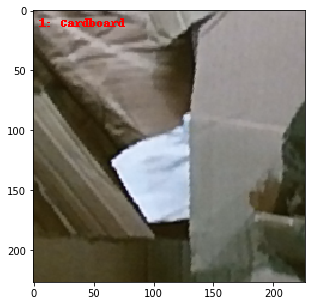

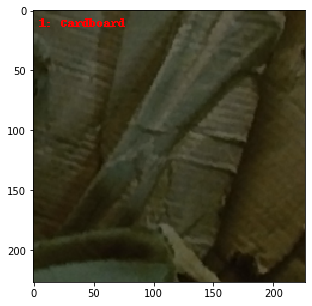

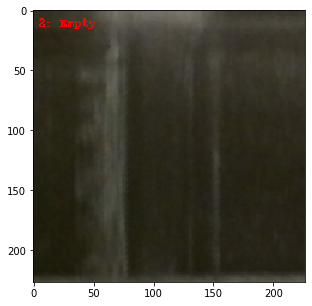

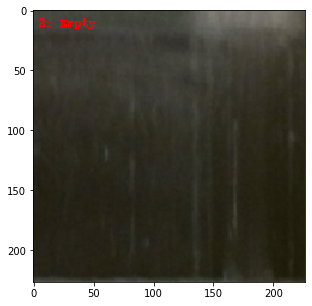

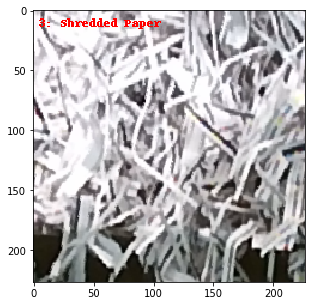

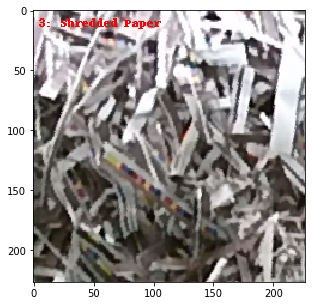

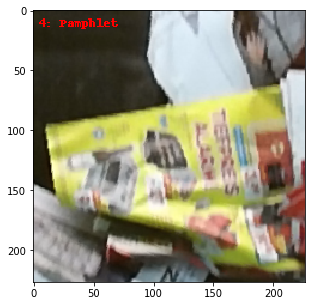

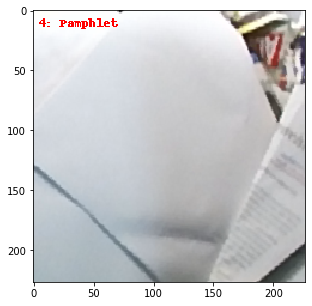

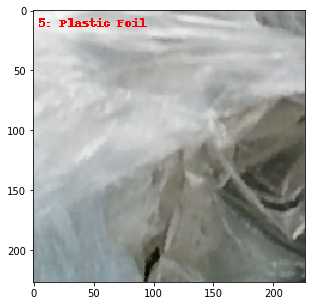

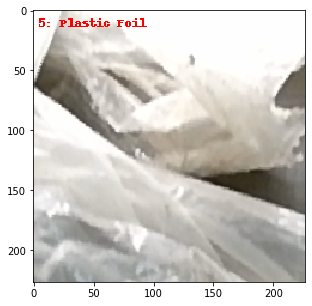

In [24]:
disply_images_per_class = 2
num_class = 5
for i in range(0, num_class):
    for j in range(0, disply_images_per_class):
        total_image_per_class = images.shape[0] / num_class
        img_index = i * 100 + j
        img = images[img_index]
        label = labels[img_index]
        img = draw_text(img,  str(label) + ": " + label_map[label] )
        plt.figure(figsize=(5, 5))
        plt.imshow(img)

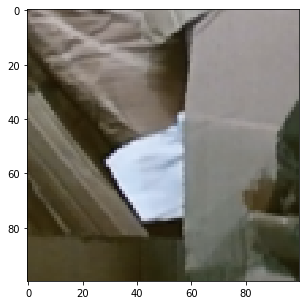

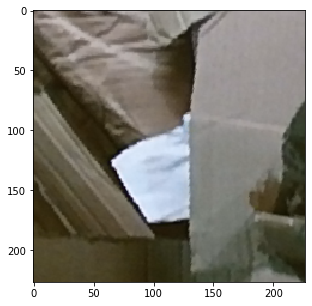

In [26]:
show_resize_effect(images[0], (100,100))